In [68]:
import numpy as np
import scipy
from scipy.sparse import csc_matrix, bmat, load_npz
from scipy.sparse.linalg import svds
import matplotlib.pyplot as plt
from tqdm import tqdm
import random

## Load Data

In [69]:
s = load_npz("data/s.npz")
a_train = load_npz("data/a_train.npz")
a_test = load_npz("data/a_test.npz")
a_val = load_npz("data/a_val.npz")

In [71]:
def prepare_train_data(alpha, s, a_train, a_val):
    c_train = bmat([[alpha*s, a_train], [a_train.transpose(), None]])
    c_val = bmat([[alpha*s, a_val], [a_val.transpose(), None]])
    #c_test = bmat([[alpha*s, a_test], [a_test.transpose(), None]])    
    return c_train, c_val

## SVD

In [ ]:
def evaluate_latent_factors(u, sig, vt, c_val):
    

In [72]:
def latent_factors_model(alpha, svd_rank, s, a_train, a_val):
    c_train, c_val = prepare_train_data(alpha, s, a_train, a_val)
    c_train = c_train.astype(np.float64)
    c_val = c_val.astype(np.float64)
    u, sig, vt = svds(c_train, k = svd_rank)
    results = evaluate_latent_factors(u, sig, vt, c_val)
    score = get_score(results)
    return score

In [ ]:
alphas = []
svd_ranks = []

In [ ]:
def validate_latent_factor_model(alphas, svd_ranks, s, a_train, a_val):
    validation_scores = []
    for alpha in alphas:
        for svd_rank in svd_ranks:
            validation_scores.append((alpha, svd_rank, evaluate_latent_factors_model(alpha, svd_rank, s, a_train, a_val))

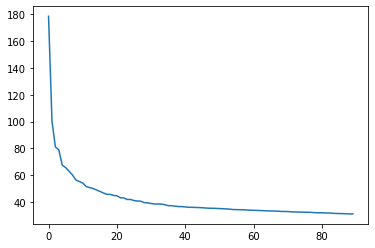

In [15]:
"singularne vrijednosti"
plt.plot(sig[::-1])

## Evaluacija SVD-a

In [64]:
"vrati listu (za k = 1:n) precisiona i recalla na testu za jednog usera"
def evaluate_user(i,n, u, sig, vt, c_train, c_val, n_groups):
    "i = user za kojeg generiramo recommendatione"
    score = (u[i,:]@np.diag(sig)@vt)[-n_groups:]
    
    true_labels = c_val.getrow(i-1).toarray().flatten()[-n_groups:]
    train_labels = c_train.getrow(i-1).toarray().flatten()[-n_groups:]
    
    score = np.multiply(score, np.logical_not(train_labels))
    
    score_index = np.flip(np.argsort(score))
    
    positives = np.sum(true_labels)
    
    negatives = n_groups - positives

    user_i_stats = []
    for predictions in range(1,n+1):
        recommendations = score_index[:predictions]
        
        true_positives = np.sum(true_labels[recommendations] == 1)

        true_negatives = negatives - (predictions - true_positives)
        
        precision = true_positives/predictions
                
        sensitivity = true_positives/positives if positives != 0 else 1
        
        specificity = true_negatives/negatives
        
        user_i_stats.append((precision, sensitivity, specificity))

    return user_i_stats

In [65]:
"evaluiraj za sve usere i svakom daj neki fiksni broj recommendationa"
stats = []
for i in tqdm(range(s.shape[0])):
    stats.append(evaluate(i = i, n = 50))

100%|██████████| 500/500 [00:06<00:00, 71.67it/s]


In [66]:
pr_se_sp = []
for n in zip(*stats):
    pr_se_sp.append((np.mean([i for i,j,k in n]), np.mean([j for i,j,k in n]), np.mean([k for i,j,k in n])))

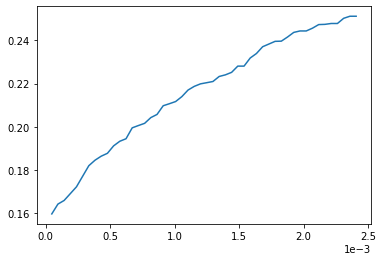

In [67]:
"graf iz papera, x = 1-specificity, y = sensitivity"
pss = np.array(pr_se_sp)
plt.plot(1 - pss[:,2], pss[:,1])
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

In [119]:
#np.savetxt("data/results.csv", pss, delimiter=",")

In [21]:
import pandas as pd
r = pd.read_csv("data/results.csv", header = None, names=["Precision", "Sensitivity", "Specificity"])

In [25]:
r

,Precision,Sensitivity,Specificity
0,0.137467,0.206453,0.999958
1,0.111700,0.238927,0.999914
2,0.096200,0.262414,0.999868
3,0.085433,0.280164,0.999823
4,0.076987,0.294791,0.999776
5,0.071100,0.308671,0.999730
6,0.065905,0.320528,0.999683
7,0.061792,0.331388,0.999636
8,0.058326,0.340930,0.999589
9,0.055267,0.349500,0.999542


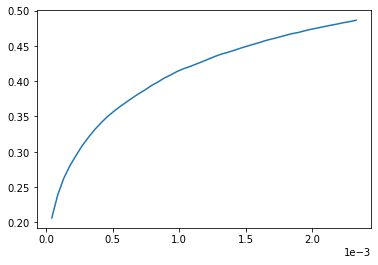

In [23]:
plt.plot(1 - r["Specificity"], r["Sensitivity"])
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

## Katz

In [21]:
def katz(t, beta, k):
    katz = beta*t
    a = beta*t
    for i in range(k-1):
        a = beta*a@t
        katz = katz + a
    return katz

In [22]:
def katz_2(t, beta, k):
    t = t.astype(np.float64)
    u, s, vt = svds(t, k=3)
    s = np.diag(s)
    
    vtu = vt@u
    svtu = s@vtu
    
    katz = beta*s
    #a = beta*svtu
    small_matrix = beta * s @ vtu
    for i in range(k-1):
        small_matrix = beta * small_matrix @ s
        katz = katz + small_matrix
        small_matrix = small_matrix @ vtu
    katz = u @ katz @ vt
    return katz